# 문제 1.

하스스톤 투기장을 한다. 하스스톤 투기장에서 이길 확률은 50%이다. 그리고 당신은 현재 하스스톤 투기장에서 3승 0패를 하고 있다. 당신의 평균 승수는 얼마인가?

Hint: 당신의 승수는 고정된 수치가 아니므로, 이항분포를 사용하는 것이 아니라 음이항분포를 사용해야 한다. 


음이항분포(Negative Binomial Distribution)는 이항분포와 관련이 있는 확률분포 중 하나입니다. 이항분포가 독립적인 베르누이 시행의 횟수가 주어진 경우에 각 시행이 성공일 확률에 따라 성공 횟수를 나타냈다면, 음이항분포는 주어진 성공 횟수에 도달하기까지의 독립적인 베르누이 시행 횟수를 나타냅니다.

음이항분포의 정의:
음이항분포는 성공 확률이 p인 베르누이 시행에서 r번째 성공이 나올 때까지의 실패 횟수를 나타내는 분포입니다. 실패가 나올 때마다 성공과 실패 각각의 확률은 동일하며, 시행은 서로 독립적입니다.

확률질량함수(PMF)는 다음과 같습니다:

$P(X = k) = \binom{k+r-1}{k} p^r (1-p)^k$

여기서 $X$는 실패 횟수, $r$은 성공 횟수, $p$는 성공 확률입니다. $\binom{n}{k}$는 조합(combination)을 나타냅니다.

음이항분포의 주요 사용 이유:

1. **경제학 및 경영 분야:** 예를 들어, 어떤 제품을 생산하는데 성공할 때까지의 실패 횟수, 즉 얼마나 많은 시도가 필요한지를 예측하는 데 사용될 수 있습니다.

2. **생물학 및 의학:** 환자의 치료가 성공할 때까지의 시도 횟수를 모델링하거나, 특정 종양이 제거될 때까지의 실패 횟수 등을 분석하는 데 쓰일 수 있습니다.

3. **통계적 품질 통제:** 제품의 생산에서 불량품이 나올 때까지의 성공과 실패를 모델링하여 품질 통제에 사용될 수 있습니다.

4. **금융 및 리스크 분석:** 금융 분야에서는 어떤 거래가 성사될 때까지의 실패 횟수를 모델링하는 데 사용될 수 있습니다.

음이항분포는 성공 횟수가 정해지지 않은 경우에 유용하게 사용됩니다.

You bring up a valid point, and it's worth noting that while individual matches in the Hearthstone Arena can be modeled using a Bernoulli distribution, the overall distribution of wins in an Arena run isn't a perfect fit for a traditional binomial distribution.

The reason for this is that an Arena run can end with fewer than the maximum number of matches (12 wins) if the player accumulates three losses before reaching that maximum. This introduces a level of complexity that isn't strictly binomial because the number of trials (matches) is not fixed at a constant value. The binomial distribution assumes a fixed number of independent trials, but in Hearthstone Arena, the number of trials varies from player to player.

To model the distribution of wins in an Arena run more accurately, you might consider a negative binomial distribution. The negative binomial distribution allows for a variable number of trials (matches) before a specified number of failures (losses) occurs. In this case, the number of matches isn't fixed, and the run ends with the third loss.

In practice, even a negative binomial distribution may not perfectly capture all the complexities of Hearthstone Arena, as factors like player skill, the quality of the deck, and other game mechanics also come into play. However, it provides a more flexible model compared to a strict binomial distribution when considering the variable number of trials in an Arena run.

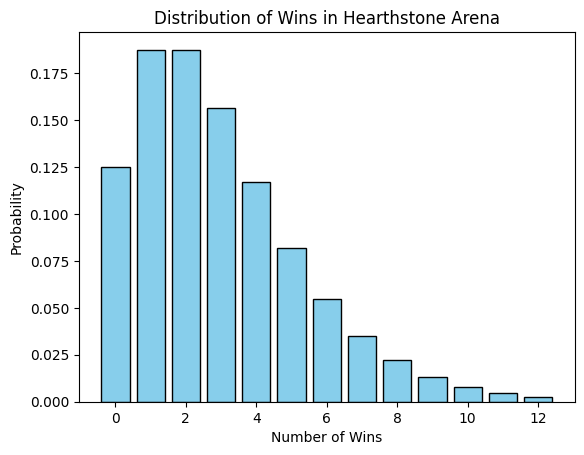

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import nbinom

# Define the parameters for the negative binomial distribution
# 'r' is the number of failures (losses) before the experiment stops
# 'p' is the probability of success (winning a single match)
r = 3  # number of losses before the Arena run ends
p = 0.5  # probability of winning a single match

# Generate the distribution for the number of wins
num_wins = np.arange(0, 13)  # possible number of wins (0 to 12)
pmf_wins = nbinom.pmf(num_wins, r, p)

# Plot the probability mass function (PMF)
plt.bar(num_wins, pmf_wins, width=0.8, color='skyblue', edgecolor='black')
plt.title('Distribution of Wins in Hearthstone Arena')
plt.xlabel('Number of Wins')
plt.ylabel('Probability')
plt.show()

In this example, r is set to 3 (the number of losses before the Arena run ends), and p is set to 0.5 as an arbitrary probability of winning a single match. You can adjust these parameters based on your assumptions or observations.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from empiricaldist import Pmf
from scipy.stats import nbinom

# Define the parameters for the negative binomial distribution
r = 3  # number of losses before the Arena run ends
prior_p = 0.5  # prior probability of winning a single match

# Generate the prior distribution
prior_wins = np.arange(13)
prior_pmf = Pmf(1,prior_wins)
prior_pmf.normalize()

# Simulate some observed data (e.g., actual wins in an Arena run)
observed_wins = np.arange(13)
likelihood = nbinom.pmf(observed_wins, r, prior_p)

# Update the prior distribution with the likelihood
posterior_pmf = prior_pmf * likelihood
posterior_pmf.normalize()

0.07663902869591346

In [6]:
likelihood

array([0.125     , 0.1875    , 0.1875    , 0.15625   , 0.1171875 ,
       0.08203125, 0.0546875 , 0.03515625, 0.02197266, 0.01342773,
       0.00805664, 0.00476074, 0.0027771 ])

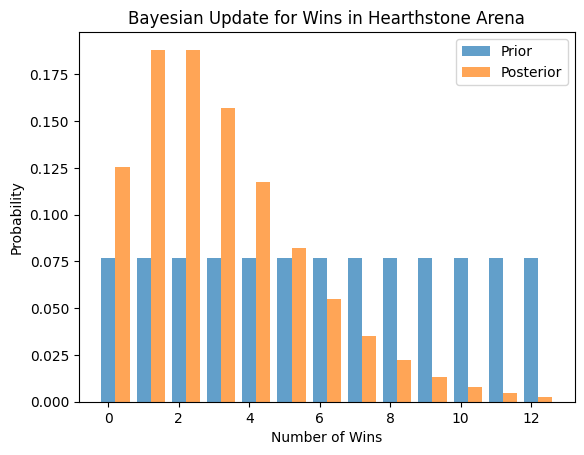

In [5]:
# Plot the prior and posterior distributions
plt.bar(prior_pmf.index, prior_pmf, width=0.4, label='Prior', alpha=0.7)
plt.bar(posterior_pmf.index + 0.4, posterior_pmf, width=0.4, label='Posterior', alpha=0.7)
plt.title('Bayesian Update for Wins in Hearthstone Arena')
plt.xlabel('Number of Wins')
plt.ylabel('Probability')
plt.legend()
plt.show()


In [7]:
posterior_pmf.mean()

2.9581891138542598

# 문제 2

Deck is composed of 20 cards, and There are two bomb card in a deck. When you draw a bomb card, it will explode. At first draw, the card is not a bomb. When it will explode? Make a bayesian table.

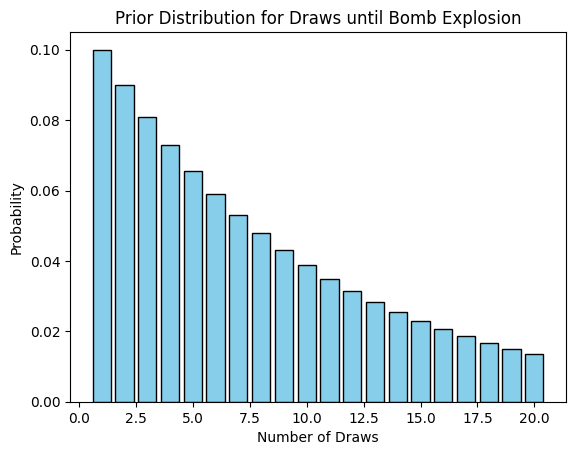

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from empiricaldist import Pmf

# Define the parameters for the negative binomial distribution
r = 1  # number of failures (draws without a bomb) before the experiment stops
p = 2 / 20  # probability of success (drawing a bomb) on each draw

# Generate the prior distribution (negative binomial distribution)
prior_draws = np.arange(1, 21)  # possible number of draws (1 to 20)
prior_pmf = Pmf(nbinom.pmf(prior_draws - 1, r, p), index=prior_draws)

# Plot the prior distribution
plt.bar(prior_pmf.index, prior_pmf, width=0.8, color='skyblue', edgecolor='black')
plt.title('Prior Distribution for Draws until Bomb Explosion')
plt.xlabel('Number of Draws')
plt.ylabel('Probability')
plt.show()

In [9]:
(prior_pmf.ps * prior_pmf.qs).sum()

6.3527003622829215